In [ ]:
# 1st exercise-Face recognition by using  the Eigenfaces method, which is the combination of Principal Component Analysis (PCA) algorithm and of the K nearest
# neighbour (K = 1) with the euclidean distance as a metric
! pip install opencv-contrib-python
! pip install scikit-image
! pip install scikit-learn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/faces.zip

Archive:  /content/gdrive/MyDrive/faces.zip
 extracting: faces/person02_19.png   
 extracting: faces/person02_20.png   
 extracting: faces/person02_21.png   
 extracting: faces/person02_22.png   
 extracting: faces/person02_23.png   
 extracting: faces/person02_24.png   
 extracting: faces/person02_25.png   
 extracting: faces/person02_26.png   
 extracting: faces/person02_27.png   
 extracting: faces/person02_28.png   
 extracting: faces/person02_29.png   
 extracting: faces/person02_30.png   
 extracting: faces/person02_31.png   
 extracting: faces/person02_32.png   
 extracting: faces/person02_33.png   
 extracting: faces/person02_34.png   
 extracting: faces/person02_35.png   
 extracting: faces/person02_36.png   
 extracting: faces/person02_37.png   
 extracting: faces/person02_38.png   
 extracting: faces/person02_39.png   
 extracting: faces/person02_40.png   
 extracting: faces/person02_41.png   
 extracting: faces/person02_42.png   
 extracting: faces/person02_43.png   
 extra

In [ ]:
from imutils import paths
import numpy as np
import cv2
import os
from statistics import stdev
def loadImages(path, set_number):
 imagePaths = list(paths.list_images(path))
 imagePaths.sort() #The image dataset is sorted in order to have an easier work
 #by acessing images of person 1 later images of person 2 etc.
 labels = []
 data = []
 if (set_number == "Set_1"):
      k = 0
      n = 7
 elif (set_number == "Set_2"):
      k = 7
      n = 19
 elif (set_number == "Set_3"):
      k = 19
      n = 31
 elif (set_number == "Set_4"):
      k = 31
      n = 45
 elif (set_number == "Set_5"):
      k = 45
      n = 64
 for image in range(len(imagePaths)):
   names = [image.split(os.path.sep)[-1] for image in imagePaths]
   person = names[image].split('_')[0]
   if (person == "person01"):
     labels.append(1)
   elif (person == "person02"):
     labels.append(2)
   elif (person == "person03"):
     labels.append(3)
   elif (person == "person04"):
     labels.append(4)
   elif (person == "person05"):
     labels.append(5)
   elif (person == "person06"):
     labels.append(6)
   elif (person == "person07"):
     labels.append(7)
   elif (person == "person08"):
     labels.append(8)
   elif (person == "person09"):
     labels.append(9)
   elif (person == "person10"):
     labels.append(10)
 #In order to have data for all people from the image dataset
 Labels = []
 while(n <= 640):
  for s in range(k,n):
   img = cv2.imread(imagePaths[s] , cv2.IMREAD_GRAYSCALE)
   img = img.reshape(-1)
   mean = np.mean(img)
   st_dev = np.std(img,ddof=1)
   img = (img-mean)/st_dev

   data.append(img)
   Labels.append(labels[s])
  k+= 64
  n+= 64
 data = np.asarray(data)
 #labels = np.unique(labels)

 return data, Labels


Set_1, labels_1 = loadImages("/content/faces", "Set_1")
Set_2, labels_2 = loadImages("/content/faces", "Set_2")
Set_3, labels_3 = loadImages("/content/faces", "Set_3")
Set_4, labels_4 = loadImages("/content/faces", "Set_4")
Set_5, labels_5 = loadImages("/content/faces", "Set_5")
print(len(Set_1),len(Set_2),len(Set_3),len(Set_4),len(Set_5))

70 120 120 140 190


**Training with the Eigenfaces method, face recognition in all sets of the Yale B dataset, and image representation of the 9 main eigenvectors.**

[INFO] computing eigenfaces took 0.1111 seconds
Set_1 accuracy=  1.0
Set_2 accuracy=  1.0
Set_3 accuracy=  0.775
Set_4 accuracy=  0.3357142857142857
Set_5 accuracy=  0.14210526315789473


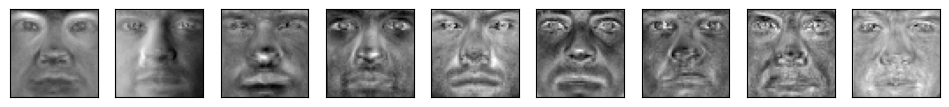

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time
def plot_images(images, d, h, w):
 fig = plt.figure(figsize=(h, w))
 for i in range(len(images)):
    ax = fig.add_subplot(1, len(images), i + 1, xticks=[], yticks=[])
    ax.imshow(images[i].reshape(d,d),cmap=plt.cm.gray)
#Implement PCA algorithm for 9 components
pca_9 = PCA(n_components=9)
start = time.time()
X_train_pca_9 = pca_9.fit_transform(Set_1)
Xtest_1_pca9 = pca_9.transform(Set_1)
Xtest_2_pca9 = pca_9.transform(Set_2)
Xtest_3_pca9 = pca_9.transform(Set_3)
Xtest_4_pca9 = pca_9.transform(Set_4)
Xtest_5_pca9 = pca_9.transform(Set_5)
end = time.time()
print("[INFO] computing eigenfaces took {:.4f} seconds".format(
	end - start))


#KNN classifier for d = 9 principal components
from sklearn.neighbors import KNeighborsClassifier
clf_9 = KNeighborsClassifier(n_neighbors = 1)
clf_9.fit(X_train_pca_9, labels_1)
set19_prediction = clf_9.predict(Xtest_1_pca9)
set29_prediction = clf_9.predict(Xtest_2_pca9)
set39_prediction = clf_9.predict(Xtest_3_pca9)
set49_prediction = clf_9.predict(Xtest_4_pca9)
set59_prediction = clf_9.predict(Xtest_5_pca9)

print("Set_1 accuracy= ",accuracy_score(labels_1, set19_prediction))
print("Set_2 accuracy= ",accuracy_score(labels_2, set29_prediction))
print("Set_3 accuracy= ",accuracy_score(labels_3, set39_prediction))
print("Set_4 accuracy= ",accuracy_score(labels_4, set49_prediction))
print("Set_5 accuracy= ",accuracy_score(labels_5, set59_prediction))
plot_images(pca_9.components_, 50, 12, 12)

In [ ]:
#Implement PCA algorithm for 30 components
pca_30 = PCA(n_components=30)
start = time.time()
X_train_pca_30 = pca_30.fit_transform(Set_1)
Xtest_1_pca30 = pca_30.transform(Set_1)
Xtest_2_pca30 = pca_30.transform(Set_2)
Xtest_3_pca30 = pca_30.transform(Set_3)
Xtest_4_pca30 = pca_30.transform(Set_4)
Xtest_5_pca30 = pca_30.transform(Set_5)
end = time.time()
print("[INFO] computing eigenfaces took {:.4f} seconds".format(
	end - start))
print(pca_30.components_.shape)
#KNN classifier for d = 30 principal components
from sklearn.neighbors import KNeighborsClassifier
clf_30 = KNeighborsClassifier(n_neighbors = 1)
clf_30.fit(X_train_pca_30, labels_1)
set130_prediction = clf_30.predict(Xtest_1_pca30)
set230_prediction = clf_30.predict(Xtest_2_pca30)
set330_prediction = clf_30.predict(Xtest_3_pca30)
set430_prediction = clf_30.predict(Xtest_4_pca30)
set530_prediction = clf_30.predict(Xtest_5_pca30)

print("Set_1 accuracy= ",accuracy_score(labels_1, set130_prediction))
print("Set_2 accuracy= ",accuracy_score(labels_2, set230_prediction))
print("Set_3 accuracy= ",accuracy_score(labels_3, set330_prediction))
print("Set_4 accuracy= ",accuracy_score(labels_4, set430_prediction))
print("Set_5 accuracy= ",accuracy_score(labels_5, set530_prediction))

[INFO] computing eigenfaces took 0.0634 seconds
(30, 2500)
Set_1 accuracy=  1.0
Set_2 accuracy=  1.0
Set_3 accuracy=  0.9583333333333334
Set_4 accuracy=  0.4357142857142857
Set_5 accuracy=  0.22631578947368422


**When transformed into images, the different eigenvectors express the patterns of the different persons in the dataset. Essentially, during reconstruction, the final result will be a linear combination of these different eigenvectors, regardless of their number.**

**With the exception of Set_1, which shows 100% classification accuracy since it was used to train the Eigenfaces method, for Set_2 we have 100% classification accuracy for both component values (d = 9 and d = 30) 100% classification accuracy, while for Set_3 the classification accuracy is very good, but not ideal (100%). For Set_4 and Set_5, it can be seen that the classification accuracy for both 9 and 30 eigenvectors is particularly low, especially for Set_5. The classification accuracy is higher for d = 30 eigenfaces for each Set. In conclusion, it can be observed that the less bright the image is and the more darkness there is from Set to Set, the lower the classification accuracy becomes and, consequently, the images are not classified correctly.**

 **Reconstruction of a random image from each of the 5 sets, for values d = 9 and d = 30.**

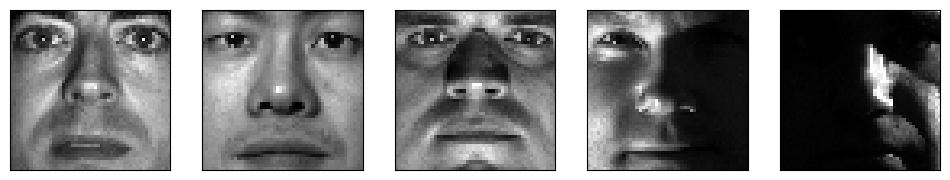

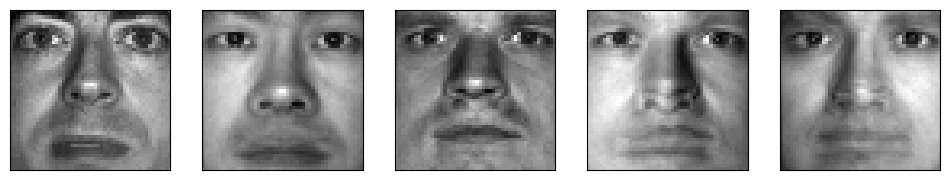

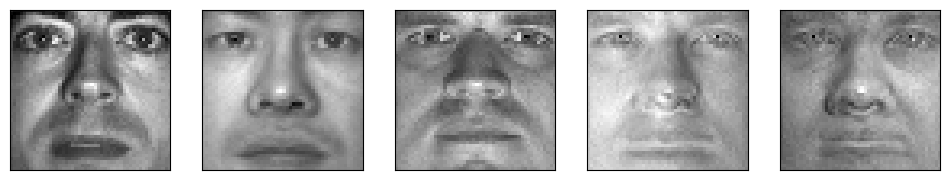

In [ ]:
#Image reconstruction with the use of inverse_transform from pca by sklearn library
#Also the content of inverse_transform is multiplied with the standard deviation and in this result of this multiplication
#the mean of the corresponding images that are going to be reconstructed is added in order to have the initial image.
import random
images = list(paths.list_images('/content/faces'))
images.sort()


im1 = random.choice(Set_1)
im2 = random.choice(Set_2)
im3 = random.choice(Set_3)
im4 = random.choice(Set_4)
im5 = random.choice(Set_5)
# 5 random pictures the Yale B dataset
images_for_show = []
images_for_show.append(im1)
images_for_show.append(im2)
images_for_show.append(im3)
images_for_show.append(im4)
images_for_show.append(im5)

images_reconstruct9 = []

images_reconstruct9.append((np.std(im1,ddof=1)*pca_9.inverse_transform(pca_9.transform(im1.reshape(1,-1))))+np.mean(im1))## ## Τranσform the data to the new axes system-
#Projections of the data on the principal axes

images_reconstruct9.append((np.std(im2, ddof=1)*pca_9.inverse_transform(pca_9.transform(im2.reshape(1,-1))))+np.mean(im2))

images_reconstruct9.append((np.std(im3, ddof=1)*pca_9.inverse_transform(pca_9.transform(im3.reshape(1,-1))))+np.mean(im3))

images_reconstruct9.append((np.std(im4,ddof=1)*pca_9.inverse_transform(pca_9.transform(im4.reshape(1,-1))))+np.mean(im4))

images_reconstruct9.append((np.std(im5,ddof=1)*pca_9.inverse_transform(pca_9.transform(im5.reshape(1,-1))))+np.mean(im5))

#Reconstruct images for d = 30 eigenvectors
images_reconstruct30 = []

images_reconstruct30.append((np.std(im1, ddof=1)*pca_30.inverse_transform(pca_30.transform(im1.reshape(1,-1))))+np.mean(im1))

images_reconstruct30.append((np.std(im2, ddof=1)*pca_30.inverse_transform(pca_30.transform(im2.reshape(1,-1))))+np.mean(im2))

images_reconstruct30.append((np.std(im3, ddof=1)*pca_30.inverse_transform(pca_30.transform(im3.reshape(1,-1))))+np.mean(im3))

images_reconstruct30.append((np.std(im4, ddof=1)*pca_30.inverse_transform(pca_30.transform(im4.reshape(1,-1))))+np.mean(im4))

images_reconstruct30.append((np.std(im5, ddof=1)*pca_30.inverse_transform(pca_30.transform(im5.reshape(1,-1))))+np.mean(im5))

#plot the initial 5 images one from each set and the reconstructed forms of these images

plot_images(images_for_show, 50, 12, 12)# Plotting the initial images
plot_images(images_reconstruct9, 50, 12, 12)# Plotting the reconstructed images from top 9 eigenvectors
plot_images(images_reconstruct30, 50, 12, 12)# Plotting the reconstructed images from top 30 eigenvectors


**The image reconstruction quality is very good for Set_1 and is the best of all the other sets in the YaleB dataset because there is less shadow around the face in the images in Set_1, so it looks better and the representation is closer to the real face. In Set_5, we have the worst reconstruction because there is more shadow than light in each image, making accurate representation increasingly difficult. Set_4 has a slightly better representation than Set_5, while Set_2 and Set_3, we have similar image reconstructions close to those of Set_1, with slightly better representations of the images in Set_2. Therefore, moving from set to set where more dark spots are observed, the characteristics of the reconstructed images will not be rendered as they should. It is observed that for d = 30, images with greater detail and closer to the actual image are obtained.**

**Application of the Singular Value Decomposition (SVD) algorithm to Set 1 of images from the Yale B dataset**

(70, 70) (70,) (2500, 2500)
[[ 0.03636842  0.03654541  0.03531635 ...  0.02084395  0.02787873
   0.03249515]
 [ 0.02822441  0.03018412  0.03626795 ... -0.00021871  0.00603449
   0.00345427]
 [-0.01817649 -0.01373492 -0.00922437 ...  0.03328254  0.03566883
   0.03746064]
 ...
 [-0.02601027 -0.00501805 -0.00585701 ... -0.0180565  -0.02213445
  -0.0372693 ]
 [ 0.02181826  0.02555648  0.0446969  ...  0.00756061  0.01838046
   0.02590742]
 [ 0.00424789 -0.02927108 -0.03467177 ... -0.01381356 -0.01042823
  -0.01137012]]


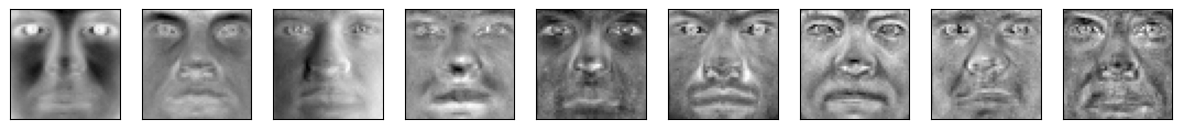

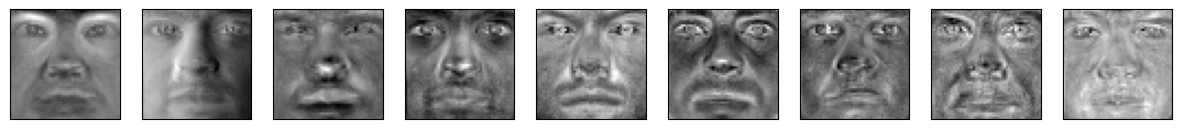

In [ ]:
from numpy.linalg import svd
U, S, Vt = svd(Set_1)
print(U.shape, S.shape, Vt.shape)
#top 9 singular vectors
# The rows of V^T are the columns of V matrix
print (Vt[:9])
B = np.transpose(Vt)
plot_images(Vt[:9], 50, 15, 15)
plot_images(pca_9.components_, 50, 15, 15)# Plotting the top 9 principal components

**From the above, it appears that for the 9 principal singular vectors, their representation is not the same as that of the 9 principal eigenvectors. This is to be expected because PCA and SVD are essentially different methods of matrix factorization.**

**The main difference between them lies in the method used to calculate the eigenvectors. In the Principal Component Analysis (PCA) method, the covariance matrix Σ (or the scatter matrix, which is an estimate of the covariance matrix when calculating the covariance matrix is costly) of the input data must first be calculated, then find its eigenvalues and eigenvectors through matrix factorization (Σ =U*L*U^T, where L is the matrix of eigenvalues and U is the matrix of eigenvectors), always in symmetric and centered data.**

**In contrast, in the Singular Value Decomposition (SVD) method, the same process is performed directly on the input data (matrix X) (X =U*S*V^T, where S is the matrix of eigenvalues and U,V are matrices whose columns are left and right eigenvectors). even on non-symmetric data (non-square matrices, for example).**

**Assignment 2: Image classification using the Support Vector Machine (SVM) algorithm**

In [ ]:
# 2nd exercise-Classification of images by using Support Vector Machine (SVM) algorithm
import tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import numpy as np
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' +str(train_X.shape))
print('Y_train: ' +str(train_y.shape))
print('X_test:  '  +str(test_X.shape))
print('Y_test:  '  +str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 784)
test_X = test_X.reshape(test_X.shape[0], 784)

In [ ]:
## Normalization

train_X = train_X/255.0
test_X = test_X/255.0
print("train data:", train_X.shape)
print("train data:", test_X.shape)

train data: (60000, 784)
train data: (10000, 784)


In [ ]:
#Linear Model buliding
import time
start = time.time()
svm_linear = SVC(kernel='linear', C = 1, gamma = 0.001)
svm_linear.fit(train_X, train_y)

# predict
y_pred_train= svm_linear.predict(train_X)
y_pred_linear = svm_linear.predict(test_X)
end = time.time()
print("done in % 0.3fs" % (end - start))
print("train accuracy:", accuracy_score(train_y, y_pred_train), "\n")
print("test accuracy:", accuracy_score(test_y, y_pred_linear), "\n")
print(classification_report(test_y, y_pred_linear))

done in  683.537s
train accuracy: 0.97075 

test accuracy: 0.9404 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
# Buliding of the non-linear model
# using rbf kernel
start = time.time()
# model
svm_non_linear = SVC(kernel='rbf', C = 10, gamma = 0.01)

# fit
svm_non_linear.fit(train_X, train_y)

# predict
y_pred_train= svm_non_linear.predict(train_X)
y_pred_non_linear = svm_non_linear.predict(test_X)
end = time.time()
print("done in % 0.3fs" % (end - start))
print("train accuracy:", accuracy_score(train_y, y_pred_train), "\n")
print("test accuracy:", accuracy_score(test_y, y_pred_non_linear), "\n")
print(classification_report(test_y, y_pred_non_linear))

**More specifically, for the SVM model with linear and rbf kernels, we used normalization constant values C, 1, and 10, as well as values for the gamma variable 0.01 and 0.001. The best performance in both the training set and the test set is for the rbf kernel type with values C = 10 and gamma = 0.01, with a classification accuracy for the training set equal to 0.99957 and an accuracy for the test set is 0.9833 in an execution time of 17 minutes and 15 seconds.**

**The Principal Component Analysis (PCA) algorithm will be applied to this task, using the C and γ values that gave the best results from the SVM algorithm. For the PCA algorithm, three values of the desired percentage of retained variance (essentially the number of components) will be used, and the SVM algorithm will be re-run with these values.**

In [ ]:
#The values of the desired percentage of conservation variance are 0.50, 0.75 and 0.90
from sklearn.decomposition import PCA
import time
start = time.time()
pca = PCA(n_components = 0.9).fit(train_X)
X_train_pca = pca.transform(train_X)
X_test_pca = pca.transform(test_X)
# Using Svm model with rbf kernel, C=10, gamma = 0.01, which is the values that for this model the results are better than all other values of C and gamma.

# model
svm= SVC(kernel='rbf', C = 10, gamma = 0.01)

# fit
svm.fit(X_train_pca, train_y)

# predict
y_pred_pca = svm.predict(X_test_pca)
end = time.time()
print("done in % 0.3fs" % (end - start))
print("accuracy:", accuracy_score(test_y, y_pred_pca), "\n")
print(classification_report(test_y, y_pred_pca))

done in  125.806s
accuracy: 0.984 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**When the Principal Component Analysis (PCA) method is applied before the Support Vector Machines (SVM) algorithm, it is generally observed that as the retained variance increases, the classification accuracy will increase, but the execution time will also increase slightly. It also concerns the execution time (training and testing), when SVM is applied with PCA applied beforehand, it will certainly be shorter because PCA will reduce the dimensions, thus resulting in fewer features for each image. This makes image classification easier since fewer dimensions (image features) require less data. Therefore, without the application of the PCA algorithm, the execution of the SVM algorithm requires more time and leads to lower classification accuracy values.**

**More specifically:nFor retained variance = 0.75, we have classification accuracy = 0.9834 and execution time = 47 seconds.
For retained variance = 0.85, we have classification accuracy = 0.9853 and execution time = 1 minute and 15 seconds.
For a retained variance of 0.9, we have a classification accuracy of 0.984 and an execution time of 2 minutes and 6 seconds.**


